In [1]:
#imports 
import pandas as pd
import numpy as np
import os 


# import data


In [2]:
#set the path to the data 
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

In [3]:
#read the data set 
test_df = pd.read_csv(test_file_path, index_col='PassengerId')
train_df = pd.read_csv(train_file_path, index_col='PassengerId')


In [6]:
# get the data type 
type(train_df)

pandas.core.frame.DataFrame

In [11]:
#get basic info from a data frame 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [14]:
# test_df info
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
Survived    418 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [13]:
#Since the test data set is missing the variable 'Survived' we should add this
#attribute with a default value of -888 so that we can concat both data sets. 
test_df['Survived'] = -888

In [17]:
#concat the two data sets row wise i.e. stack on data frame on top of the other 
# axis = 0 stack on data frame on top of another,
# axis = 1 concat data frames side to side like a sql join
# sort = True means sort the data frames so that variables line up 
df = pd.concat((test_df, train_df), axis=0, sort=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [22]:
# use .head to look at the first few rows of the data

df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
892,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,3,male,0,-888,330911
893,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,-888,363272
894,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,2,male,0,-888,240276
895,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,3,male,0,-888,315154
896,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,female,1,-888,3101298


In [23]:
# we can pass a number to see the top n rows
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
892,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,3,male,0,-888,330911
893,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,-888,363272
894,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,2,male,0,-888,240276
895,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,3,male,0,-888,315154
896,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,female,1,-888,3101298
897,14.0,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,3,male,0,-888,7538
898,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,3,female,0,-888,330972
899,26.0,NaN,S,29.0000,"Caldwell, Mr. Albert Francis",1,2,male,1,-888,248738
900,18.0,NaN,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,3,female,0,-888,2657


In [24]:
# .tail to look at the last few rows of the data 
df.tail(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
882,33.0,NaN,S,7.8958,"Markun, Mr. Johann",0,3,male,0,0,349257
883,22.0,NaN,S,10.5167,"Dahlberg, Miss. Gerda Ulrika",0,3,female,0,0,7552
884,28.0,NaN,S,10.5000,"Banfield, Mr. Frederick James",0,2,male,0,0,C.A./SOTON 34068
885,25.0,NaN,S,7.0500,"Sutehall, Mr. Henry Jr",0,3,male,0,0,SOTON/OQ 392076
886,39.0,NaN,Q,29.1250,"Rice, Mrs. William (Margaret Norton)",5,3,female,0,0,382652
887,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,2,male,0,0,211536
888,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,1,female,0,1,112053
889,NaN,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,3,female,1,0,W./C. 6607
890,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,1,male,0,1,111369


# Selecting Rows and Columns 

In [25]:
# select the name columnwith the dot operator .[Variable Name]
df.Name 

PassengerId
892                                     Kelly, Mr. James
893                     Wilkes, Mrs. James (Ellen Needs)
894                            Myles, Mr. Thomas Francis
895                                     Wirz, Mr. Albert
896         Hirvonen, Mrs. Alexander (Helga E Lindqvist)
897                           Svensson, Mr. Johan Cervin
898                                 Connolly, Miss. Kate
899                         Caldwell, Mr. Albert Francis
900            Abrahim, Mrs. Joseph (Sophie Halaut Easu)
901                              Davies, Mr. John Samuel
902                                     Ilieff, Mr. Ylio
903                           Jones, Mr. Charles Cresson
904        Snyder, Mrs. John Pillsbury (Nelle Stevenson)
905                                 Howard, Mr. Benjamin
906    Chaffee, Mrs. Herbert Fuller (Carrie Constance...
907        del Carlo, Mrs. Sebastiano (Argenia Genovesi)
908                                    Keane, Mr. Daniel
909                

In [26]:
# by passing a string
df['Name']

PassengerId
892                                     Kelly, Mr. James
893                     Wilkes, Mrs. James (Ellen Needs)
894                            Myles, Mr. Thomas Francis
895                                     Wirz, Mr. Albert
896         Hirvonen, Mrs. Alexander (Helga E Lindqvist)
897                           Svensson, Mr. Johan Cervin
898                                 Connolly, Miss. Kate
899                         Caldwell, Mr. Albert Francis
900            Abrahim, Mrs. Joseph (Sophie Halaut Easu)
901                              Davies, Mr. John Samuel
902                                     Ilieff, Mr. Ylio
903                           Jones, Mr. Charles Cresson
904        Snyder, Mrs. John Pillsbury (Nelle Stevenson)
905                                 Howard, Mr. Benjamin
906    Chaffee, Mrs. Herbert Fuller (Carrie Constance...
907        del Carlo, Mrs. Sebastiano (Argenia Genovesi)
908                                    Keane, Mr. Daniel
909                

In [28]:
# we can select more than one column by using array of string
df[['Name', 'Age']]

,Name,Age
PassengerId,,
892,"Kelly, Mr. James",34.5
893,"Wilkes, Mrs. James (Ellen Needs)",47.0
894,"Myles, Mr. Thomas Francis",62.0
895,"Wirz, Mr. Albert",27.0
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0
897,"Svensson, Mr. Johan Cervin",14.0
898,"Connolly, Miss. Kate",30.0
899,"Caldwell, Mr. Albert Francis",26.0
900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0


In [35]:
#select index with .loc[ROWS, COLUMS] 
#if row or columns is left out it selects all the rows of columns 

#select row 5 - 10, the columns is left blank
df.loc[5:10, ]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1,237736


In [37]:
#select rows 5 - 10 , and columsn with the attribute 'Name', and 'Pclass' only
df.loc[5:10, ['Name', 'Pclass']]

,Name,Pclass
PassengerId,,
5,"Allen, Mr. William Henry",3
6,"Moran, Mr. James",3
7,"McCarthy, Mr. Timothy J",1
8,"Palsson, Master. Gosta Leonard",3
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",3
10,"Nasser, Mrs. Nicholas (Adele Achem)",2


In [38]:
#select rows 10 - 15 and all the columsn between 'age' and 'Pclass'\
df.loc[10:15, 'Age':'Pclass']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass
PassengerId,,,,,,,
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2
11,4.0,G6,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,3
12,58.0,C103,S,26.5500,"Bonnell, Miss. Elizabeth",0,1
13,20.0,NaN,S,8.0500,"Saundercock, Mr. William Henry",0,3
14,39.0,NaN,S,31.2750,"Andersson, Mr. Anders Johan",5,3
15,14.0,NaN,S,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina",0,3


In [39]:
# we can use .iloc to use just indexing
df.iloc[5:10, 3:8]

,Fare,Name,Parch,Pclass,Sex
PassengerId,,,,,
897,9.2250,"Svensson, Mr. Johan Cervin",0,3,male
898,7.6292,"Connolly, Miss. Kate",0,3,female
899,29.0000,"Caldwell, Mr. Albert Francis",1,2,male
900,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,3,female
901,24.1500,"Davies, Mr. John Samuel",0,3,male


# Filtering 

In [42]:
# filter rows based on a condition

#filter rows so that only the male passengers are selected
male_passengers = df.loc[df.Sex == 'male', :]
print('# of male passagers : {0}'.format(len(male_passengers)))

# of male passagers : 843


In [45]:
#filter the rows so that only passengers 
#who are male and also belong to 1st class are selected
male_pass_fc = df.loc[(df.Sex == 'male') & (df.Pclass == 1), :]
print(('# of male 1st class passagers : {0}').format(len(male_pass_fc)))

# of male 1st class passagers : 179


# Summary Stats
#### centrality measure: mean/median a measure of the center of the data
- mean: average behavior for some feature. However this summary stat is affected by extreme values
- median: middle value of sorted values, if # of values are even get 2 middle and devide by two. not affected by extreme values
#### dispersion measure: range, how similar or disimalar values are
- range: dif between max - min how spead out the data is, easlily affected by extreme values 
- percentiles: 25th, 50th 75th devide the data set into 4 buckets, quartiles spread the data into buckets and obseve the spead(box-whisker plot)
- variance: how far a value is from the mean, affected by extreme values 
- standard deviation: sqrt(variance) 

In [47]:
# .describe() gets summary stats for all numerical features 
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [50]:
# numerical features centrality 
print('Mean Fare: {0}'.format(df.Fare.mean()))
print('median Fare: {0}'.format(df.Fare.median()))

Mean Fare: 33.2954792813
median Fare: 14.4542


In [60]:
#numerical features dispersion
print('Min Fare: {0}'.format(df.Fare.min()))
print('Max Fare: {0}'.format(df.Fare.max()))
print('Range Fare: {0}'.format(df.Fare.max() - df.Fare.min()))
#Quantiles
print('Quantiles')
print('25% Fare: {0}'.format(df.Fare.quantile(.25)))
print('50% Fare: {0}'.format(df.Fare.quantile(.50)))
print('75% Fare: {0}'.format(df.Fare.quantile(.75)))
print('Variance Fare: {0}'.format(df.Fare.var()))
print('standard deviation Fare: {0}'.format(df.Fare.std()))

Min Fare: 0.0
Max Fare: 512.3292
Range Fare: 512.3292
Quantiles
25% Fare: 7.8958
50% Fare: 14.4542
75% Fare: 31.275
Variance Fare: 2678.95973789
standard deviation Fare: 51.7586682392


In [62]:
%matplotlib inline

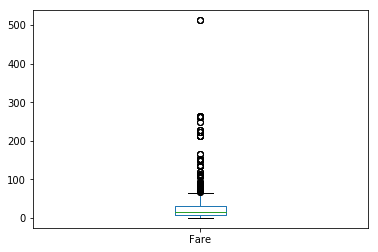

In [63]:
#box-whiskers plot
df.Fare.plot(kind='box')

# catagorical features 
- counts, porportions

In [64]:
# to include catagorical features in the .descrbe() function use include='all'
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [65]:
# catagorial counts 
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [66]:
#catagoriacal proprotions
df.Sex.value_counts(normalize='True')

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [68]:
#fileter out survived 1 and not survived 0
df[df.Survived != -888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [69]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

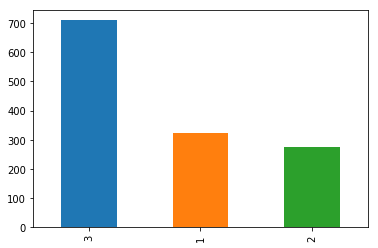

In [72]:
df.Pclass.value_counts().plot(kind='bar')

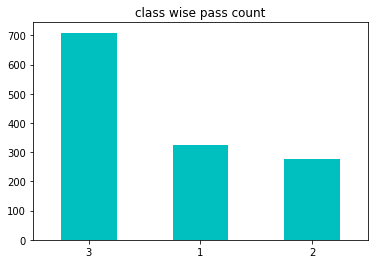

In [73]:
#visualize counts
df.Pclass.value_counts().plot(kind='bar', rot = 0, title='class wise pass count', color='c');